
## STOCHASTIC MODELING
MODULE 4 | LESSON 1


---

# **MARKOV CHAINS**

|  |  |
|:---|:---|
|**Reading Time** |  60 minutes |
|**Prior Knowledge** |Linear Algebra, Maximum likelihood estimator, Monte Carlo  |
|**Keywords** |Markov Process, Markov chains, Transition Matrix


---

*In this notebook, we introduce Markov chains in a reinforcement learning framework with Python. This lecture represents the first building block in order to understand more complex reinforcement learning methods. Make sure you understand this properly because it is going to lay the foundation for future work.*

## **1. REINFORCEMENT LEARNING**

### **1.1 Introduction to Reinforcement Learning**

Machine learning provides automated methods that can detect patterns
in data and use them to achieve some tasks. Within ML methods, reinforcement learning (RL) is the task of learning how a decision-maker should take sequences of actions in order to optimize the cumulative rewards.

### **1.2 The RL Setting**

The general RL problem is formalized as a discrete time stochastic control problem. At each time step $t$, the environment is represented by a *state* $s_t\in\mathcal{S}$, where $\mathcal{S}$ represents the state space, i.e., all the possible situations where the agent can fall. Given $s_t$, the agent must take an action $a_t\in\mathcal{A}$ that implies (i) a reward $r_t\in\mathcal{R}$ for the agent, and (ii) a transition to state $s_{t+1}\in\mathcal{S}$.

Beginning at time $t=0$, the RL problem boils down to finding a sequence of actions $\{a_0,a_1,...,a_t,...\}$ that maximizes the cumulative rewards for the agent.

### **1.3 The Markov Property**
We are going to consider the stochastic control process with the Markovian property.

**Definition**. A discrete time stochastic control process is Markovian (i.e., it has the Markov property) if
*   $\mathbb{P}(s_{t+1}|s_{t},a_{t})=\mathbb{P}(s_{t+1}|s_{t},a_{t},...,s_{0},a_{0})$
*   $\mathbb{P}(r_{t}|s_{t},a_{t})=\mathbb{P}(r_{t}|s_{t},a_{t},...,s_{0},a_{0})$

The Markov property means that the future of the process only
depends on the current observation, and the agent has no interest in looking at the full history. Before studying a fully fledged case of Reinforcement Learning, we are going to focus on the properties of random process with the Markov property and some specific finance applications.

## **2. MARKOV CHAINS**

If the state space consists of countably many states, the Markov process is called a Markov chain, formally defined as follows:

A sequence of random variables $(S_0,S_1,S_2,...)$ is a Markov chain with state space $\mathcal{S}$ and transition matrix $P$ if, for all $t\geq 0$ and all sequences $(s_0,s_1,s_2,...,s_t,s_{t+1})$, we have that $\mathbb{P}(S_{t+1}|s_{t},s_{t-1},...,s_{1},s_{0})=\mathbb{P}(S_{t+1}|s_{t})$.

### **2.1 Homogeneous Markov Chains**

We say that a Markov chain with state space $\mathcal{S}=\{s_1,...,s_N\}$ is homogeneous if $\mathbb{P}(S_{t+1}=s_i | S_{t}=s_j)$ is constant for all $t$ and $(i,j)$. For homogeneous Markov chains, we can specify $\mathbb{P}(S_{t+1}=s_j | S_{t}=s_i) = p_{ij}$ and, then, the matrix $P(p_{ij})$ is the transition matrix for $S_t$, where it must satisfy that $\sum_i p_{ij} = 1$ for all $i$. 

A Markov chain's transition matrix P is a stochastic matrix, i.e., a square matrix of non-negative terms in which the elements in each row sum to one.

*Note: Some authors opt to define the transition matrix $P$ as the matrix whose entries $p_{ij}$ denote the probability that the state changes from $j$ to $i$. We prefer the notation with the convention above as the most intuitive.*

We have described how the one-step-ahead realizations of a Markov chain depend on its current realizations. How do the further-ahead realizations of the chain depend also on current realizations? For instance, notice that
$$
\begin{align}
\mathbb{P}(s_{t+2}=s_j | s_{t}=s_i) & = \sum_{k=1}^N \mathbb{P}(s_{t+2}=s_j | s_{t+1}=s_k, s_{t+1}=s_i)\mathbb{P}(s_{t+1}=s_k | s_{t}=s_i) \\
& = \sum_{k=1}^N \mathbb{P}(s_{t+2}=s_j | s_{t+1}=s_k)\mathbb{P}(s_{t+1}=s_k | s_{t+1}=s_i) \\
& =  \sum_{k=1}^N p_{kj}p_{ik}
\end{align}
$$
Notice that this result yields the $(i,j)^{th}$ position of the squared transition matrix, $P^2$.

Following the same logic, letting $p_{ij}^n$ denote the $(i,j)^{th}$ position of matrix $P^n$:
$$
\begin{align}
\mathbb{P}(s_{t+m}=s_j | s_{t+n}=s_i) = p_{ij}^{m+n} = \sum_{k=1}^N p_{kj}^n p_{ik}^m
\end{align}
$$

### **2.2 Example: A Two-state Homogeneous Markov Chain**

Let $\mathcal{S}=\{s_1,s_2\}$, with $s_1\lt s_2$, $\mathbb{P}(S_{t+1}=s_1|s_{1}) = p$, and $\mathbb{P}(S_{t+1}=s_2|s_{2})= q$. Then, we can represent the transition matrix for this chain as
$$
\begin{align}
P = \begin{bmatrix}
p & 1-p \\
1-q & q
\end{bmatrix}
\end{align}
$$
If we multiply the transition matrix by the vector that represents the state space of the process, we obtain the expectation of the next period's state, conditional on each state. In our simple 2-state case:
$$
\begin{align}
\begin{bmatrix}
p & 1-p \\
1-q & q
\end{bmatrix}
\begin{bmatrix}
s_1 \\
s_2
\end{bmatrix}
=
\begin{bmatrix}
E(s_{t+1}|s_t = s_1) \\
E(s_{t+1}|s_t = s_2)
\end{bmatrix}
\end{align}
$$
Suppose that a process $X_t$ is such that $X_t = X_{t-1} + s_t$, where $s_t$ is the Markov process above. Let's simulate the process for some arbitrary parameters.

In [2]:
# LIBRARIES WE USE IN THE NOTEBOOK
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand, seed

In [3]:
N_STATES = 2
S = np.zeros((2, 1))
P = np.zeros((2, 2))

S[0] = -1
S[1] = 1

P[0, 0] = 0.55
P[0, 1] = 1.0 - P[0, 0]
P[1, 1] = 0.55
P[1, 0] = 1.0 - P[1, 1]

# Display the state vector
print("State vector:\n", S)
# Display the transition matrix
print("Transition matrix:\n", P)
# Display the conditional mean vector
S_condmean = np.dot(P, S)
print("Conditional mean vector:\n", S_condmean)

State vector:
 [[-1.]
 [ 1.]]
Transition matrix:
 [[0.55 0.45]
 [0.45 0.55]]
Conditional mean vector:
 [[-0.1]
 [ 0.1]]


-1


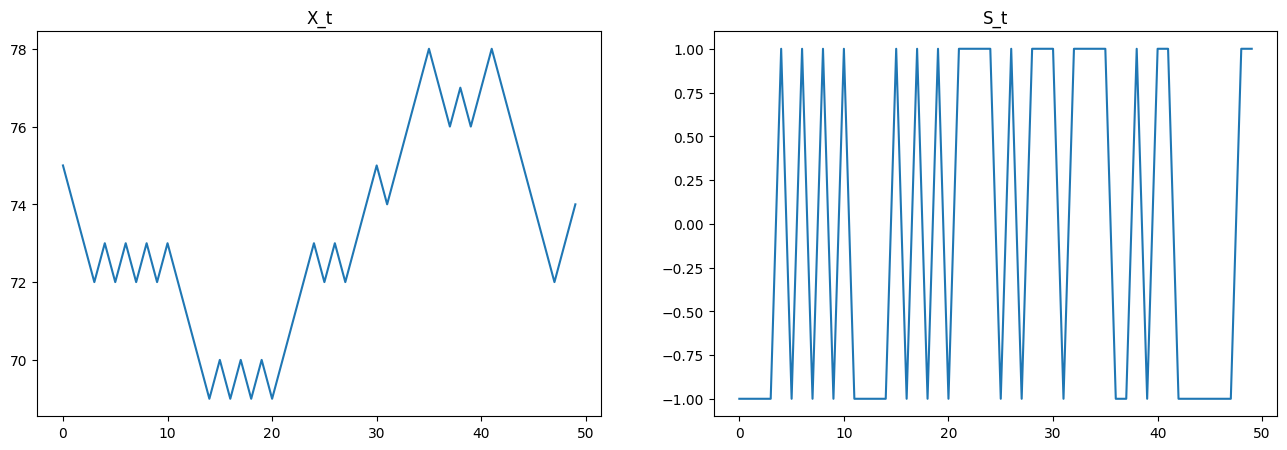

In [4]:
# SAMPLING FROM THE MARKOV CHAIN
# Simulate a sequence from the chain
# seed random number generator
np.set_printoptions(precision=3, suppress=True)
seed(12345)

LEN_HIST = 50
states = np.zeros((LEN_HIST, 2), np.int8)
Xarray = np.zeros(LEN_HIST)
Psim = np.zeros((2, 2))
S_DICT = dict(
    [
        (
            "1",
            0,
        ),
        ("2", 1),
    ]
)
S_VAL = dict(
    [
        (
            "1",
            -1,
        ),
        ("2", 1),
    ]
)

print(S_VAL["1"])

# Generate sequence of uniform random numbers
randarray = rand(LEN_HIST)
# Initialize process s_0, say at state 1 (0 in Python's vector notation)
states[0, :] = (S_DICT["1"], S_VAL["1"])
Xarray[0] = 75  # states[0]

for tt in range(1, LEN_HIST):
    if P[states[tt - 1, 0], states[tt - 1, 0]] > randarray[tt]:
        states[tt, :] = states[tt - 1, :]
    else:
        if states[tt - 1, 0] == S_DICT["1"]:
            states[tt, :] = [S_DICT["2"], S_VAL["2"]]
        else:
            states[tt, :] = [S_DICT["1"], S_VAL["1"]]
    Xarray[tt] = Xarray[tt - 1] + states[tt, 1]
    Psim[states[tt - 1, 0], states[tt, 0]] = (
        1.0 + Psim[states[tt - 1, 0], states[tt, 0]]
    )

# Plot the evolution of the X_t and s_t
plt.subplot(1, 2, 1)
plt.plot(Xarray)
plt.title("X_t")

plt.subplot(1, 2, 2)
plt.plot(states[:, 1])
plt.title("S_t")

fig = plt.gcf()
fig.set_size_inches(16, 5)
plt.show()

### **2.3 Estimating Markov Transition Probabilities from Transition Data**

Suppose that we observe the realizations of a Markov chain and wish to estimate the probabilities of the transition matrix $P$. If $n_{ij}$ is the number of times that we observe a change from state $i$ to state $j$ and $N$ is the total number of states, then the estimated transition probabilities can be computed as:
$$
\begin{align}
\widehat{p}_{ij} = \frac{n_{ij}}{\sum_{k=1}^N n_{ik}}
\end{align}
$$

One can show that this expression corresponds to the Maximum Likelihood Estimator for $p_{ij}$. Let's verify that the Monte Carlo exercise yields the correct transition matrix.

In [5]:
# Compute estimated transition matrix from the Monte Carlo exercise
Pest = (Psim.T / np.sum(Psim, axis=1)).T

print(Pest)

[[0.462 0.538]
 [0.565 0.435]]


Take into account that in order to increase the accuracy of the estimation, it is important to increase the number of Monte Carlo simulations ("LEN_HIST" in the code above).

### **2.4 Stationary Distribution of a Markov Chain**

Consider the matrix $P^n$, whose $(i,j)^{th}$ element is $p_{ij}^n = \mathbb{P}(s_{t+n}=s_j | s_{t}=s_i)$. If memory of the past dies out with increasing $n$, then we would expect the dependence of $p_{ij}^n$ on both n and i to disappear as $n→\infty$. This means that $P^n$ should converge to a limit as $n→\infty$ and that for each column $j$, its elements should all converge toward the same value $\pi_j$, and all its rows should be identical.

Notice that $p_{ij}^{n+1} = \sum_{k=1}^N p_{kj} p_{ik}^n$. Assuming convergence, this means that the limiting distribution as $n→\infty$ satisfies $\pi_{j}^{n+1} = \sum_{k=1}^N p_{kj} \pi_{k}$. In vector form:
$$
\begin{align}
\pi = \pi P ;\ \text{where}\ \pi=\{\pi_1,...,\pi_N\}, \pi_k\geq 0\  \text{and}\ \sum_k\pi_k = 1
\end{align}
$$
If the row-vector $\pi$ is taken as the initial probability distribution of the Markov chain, then $\pi = \pi P = \pi P^2= \pi P^3=...$, and we say that the chain is in steady state.

Under what conditions does convergence take place? Under what conditions is $\pi$ unique? While we are going to omit the details, convergence is essentially assured by the fact that $P$ is a stochastic matrix whose largest eigenvalue is one. Uniqueness is guaranteed under the property ergodicity. This means that, first, there is positive probability of traveling from any state to any other. Second, it means that the states are not partitioned into sets such that all state transitions occur cyclically from one set to another.

In [7]:
# Compute estimated stationary distribution from the Monte Carlo exercise
Pstat = [1.0 - np.sum(states[:, 0]) / LEN_HIST, np.sum(states[:, 0]) / LEN_HIST]

print(Pstat)

[np.float64(0.52), np.float64(0.48)]


In [9]:
P40

array([[0.5, 0.5],
       [0.5, 0.5]])

In [6]:
# Compute estimated stationary distribution from the Monte Carlo exercise
Pstat = [1.0 - np.sum(states[:, 0]) / LEN_HIST, np.sum(states[:, 0]) / LEN_HIST]

print(Pstat)

# Compute the stationary distribution from the transition matrix.
# We can follow two methods:
# 1. Matrix multiplication
P2 = np.matmul(P, P)
print(P2)
P3 = np.matmul(P2, P)
print(P3)
P10 = np.linalg.matrix_power(P, 10)
print(P10)
P40 = np.linalg.matrix_power(P, 40)
print(P40)

# Sequential multiplication of a vector
p_stat = 0.5 * np.ones((2))
for t in range(1, 100):
    p_stat = np.dot(P.T, p_stat)

print(p_stat)

# Check this results with the matrix Pstat above (both methods should give the "same" results)

[np.float64(0.52), np.float64(0.48)]
[[0.505 0.495]
 [0.495 0.505]]
[[0.501 0.499]
 [0.499 0.501]]
[[0.5 0.5]
 [0.5 0.5]]
[[0.5 0.5]
 [0.5 0.5]]
[0.5 0.5]


Again, you should be able to increase the accuracy of "Pstat" by increasing the number of Monte Carlo simulations.

**Absorbing Markov chains**

Absorbing Markov chains play a prominent role in Finance, for example, by identifying default as an absorbing state.

If a Markov chain is homogeneous, we say that state $i$ is absorbing if $p_{ii}=1$. That is, once the Markov chain $S_t$ enters an absorbing state, it stays there forever.

## **3. Application to Credit Ratings**

Credit ratings provide investors invaluable information to assess firms' abilities to meet their debt obligations, i.e., the probability of default. Ratings are published periodically and change from time to time to reflect firms' changes in credit risk. It is useful to use a Markov chain model to describe the dynamics of a firm's credit rating.

Consider a homogeneous Markov chain $S_t$ defined on the state space $\mathcal{S}=\{1,2,...,D-1,D\}$ with transition matrix $P$. State 1 represents the highest credit class, state 2 the second highest, and so on, while state $D-1$ refers to the lowest credit class, and state $D$ represents default.

The table below shows the actual transition probabilities for credit ratings published by Standard & Poor's ($NR$ stands for "rating withdrawn").<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

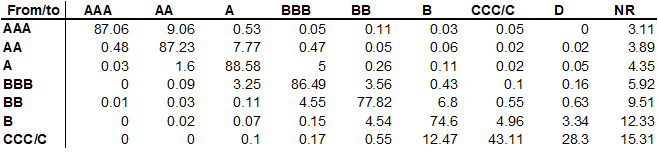

In the next example, we consider the transition matrix as given (see above) and we are gonna simulate how long it takes a firm to default starting with some current rating. 

In [6]:
# seed random number generator
seed(12345)

np.set_printoptions(precision=3, suppress=True)

P0 = np.array(
    [
        [87.06, 9.06, 0.53, 0.05, 0.11, 0.03, 0.05, 0.0, 3.11],
        [0.48, 87.23, 7.77, 0.47, 0.05, 0.06, 0.02, 0.02, 3.89],
        [0.03, 1.6, 88.58, 5.0, 0.26, 0.11, 0.02, 0.05, 4.35],
        [0, 0.09, 3.25, 86.49, 3.56, 0.43, 0.1, 0.16, 5.92],
        [0.01, 0.03, 0.11, 4.55, 77.82, 6.8, 0.55, 0.63, 9.51],
        [0.0, 0.02, 0.07, 0.15, 4.54, 74.6, 4.96, 3.34, 12.33],
        [0.0, 0.0, 0.1, 0.17, 0.55, 12.47, 43.11, 28.3, 15.31],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0],
    ]
)

# Normalize transition matrix, ignoring NR type
P = P0[:, 0 : P0.shape[1] - 1]  # noQA E203
P = (P.T / np.sum(P, axis=1)).T

# Verify where the ratings process converges given these estimates
P10 = np.linalg.matrix_power(P, 10)
print(P10)

P40 = np.linalg.matrix_power(P, 200)
print(P40)

# SAMPLING FROM THE MARKOV CHAIN
# Simulate how long it takes a firm to default starting with some current rating
RATINGS = dict(
    [
        ("AAA", 0),
        ("AA", 1),
        ("A", 2),
        ("BBB", 3),
        ("BB", 4),
        ("B", 5),
        ("CCC", 6),
        ("D", 7),
    ]
)
CURR_RATING = "CCC"

N_HISTORIES = 1000
LEN_HIST = 100
histories = np.zeros((N_HISTORIES, LEN_HIST), np.int8)
histories[:, 0] = RATINGS[CURR_RATING]
randarray = rand(N_HISTORIES, LEN_HIST)

default_time = np.zeros(N_HISTORIES)
default_sum = 0

for i in range(0, N_HISTORIES):
    for j in range(1, LEN_HIST):
        for r in RATINGS:
            if randarray[i, j] < np.cumsum(P[histories[i, j - 1], :])[RATINGS[r]]:
                histories[i, j] = RATINGS[r]
                break
        if histories[i, j] == RATINGS["D"]:
            break
    # Compute the average time to default
    if np.max(histories[i, :]) == RATINGS["D"]:
        where_default = np.where((histories[i, :] == RATINGS["D"]))
        default_time[i] = where_default[0][0]
        default_sum += 1
    else:
        default_time[i] = 0.0

print("Default time:", np.sum(default_time) / default_sum)

[[0.353 0.387 0.192 0.046 0.011 0.006 0.001 0.005]
 [0.021 0.42  0.395 0.124 0.021 0.01  0.002 0.008]
 [0.003 0.083 0.541 0.276 0.055 0.023 0.003 0.016]
 [0.001 0.019 0.182 0.515 0.156 0.07  0.01  0.047]
 [0.    0.005 0.044 0.203 0.311 0.228 0.031 0.178]
 [0.    0.002 0.012 0.054 0.154 0.302 0.045 0.432]
 [0.    0.001 0.005 0.018 0.052 0.115 0.018 0.79 ]
 [0.    0.    0.    0.    0.    0.    0.    1.   ]]
[[0.001 0.011 0.044 0.053 0.024 0.018 0.003 0.847]
 [0.001 0.01  0.04  0.047 0.022 0.016 0.002 0.862]
 [0.001 0.009 0.035 0.042 0.019 0.014 0.002 0.878]
 [0.    0.007 0.028 0.033 0.015 0.011 0.002 0.905]
 [0.    0.004 0.016 0.019 0.009 0.007 0.001 0.945]
 [0.    0.002 0.008 0.009 0.004 0.003 0.    0.973]
 [0.    0.001 0.003 0.003 0.002 0.001 0.    0.99 ]
 [0.    0.    0.    0.    0.    0.    0.    1.   ]]
Default time: 8.28688524590164


## **4. Conclusion**

In this lesson, we have worked through the concept of a Markov Chain and its application to a simple credit rating case study. In the next lesson, we will apply these concepts to bond valuation.

See you there!

---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
